HINDI DATASETS:
1. https://github.com/Siddhartha15/Hindi-Fake-News-Detection/blob/main/Data/fake_news.csv
2. https://github.com/Siddhartha15/Hindi-Fake-News-Detection/blob/main/Data/true_news.csv


REFERENCES FOR MODELS:
1. https://github.com/therealcyberlord/Fake-News-Detection-Using-RNN.git
2. https://www.kaggle.com/code/sahrul/fake-news-detection-using-cnn/notebook
3. https://www.kaggle.com/code/sathiyaak/fake-news-detection-using-logistic-regression
4. https://www.kaggle.com/code/vai15r32/fake-news-detection-using-multinomial-naive-baye/input

**HYBRID CNN-RNN MODEL**


In [1]:
import pandas as pd
import random

# Load the fake news dataset
fake_news_df = pd.read_csv("/content/drive/MyDrive/hindi_fake_news.csv")

# Load the true news dataset
true_news_df = pd.read_csv("/content/drive/MyDrive/hindi_true_news.csv")

# Add a label to each dataset to distinguish between fake and true news
fake_news_df['Label'] = 1 # 0 for fake news
true_news_df['Label'] = 0 # 1 for true news

# Merge the two datasets
merged_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

# Shuffle the merged dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the merged and shuffled dataset
shuffled_df.to_csv("merged_and_shuffled_dataset.csv", index=False)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D
from gensim.models import Word2Vec


# Preprocess dataset
X = shuffled_df['Articles'].values
y = shuffled_df['Label'].values

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences
max_length = 1000
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Tokenize the text data
tokenized_data = [simple_preprocess(Articles) for Articles in X]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Save Word2Vec model
word2vec_model.save("word2vec_model.h5")

# Define CNN-RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(units=100))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save model
model.save("fake_news_detection_model.h5")
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load tokenizer and model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
model = load_model("fake_news_detection_model.h5")

# Function to preprocess input text
def preprocess_input_text(text):
    tokenized_text = tokenizer.texts_to_sequences([text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_length)
    return padded_text

# Function to predict the label of the input text
def predict_news(text):
    preprocessed_text = preprocess_input_text(text)
    prediction = model.predict(preprocessed_text)
    if prediction[0][0] >= 0.5:
        return "Fake News"
    else:
        return "True News"

# Example usage:
user_input = input("Enter the news article: ")
prediction = predict_news(user_input)
print("Prediction:", prediction)

Epoch 1/10
89/89 [==============================] - 20s 147ms/step - loss: 0.4516 - accuracy: 0.7470 - val_loss: 0.2091 - val_accuracy: 0.9213
Epoch 2/10
89/89 [==============================] - 7s 81ms/step - loss: 0.0848 - accuracy: 0.9717 - val_loss: 0.1595 - val_accuracy: 0.9445
Epoch 3/10
89/89 [==============================] - 5s 55ms/step - loss: 0.0178 - accuracy: 0.9963 - val_loss: 0.2016 - val_accuracy: 0.9382
Epoch 4/10
89/89 [==============================] - 3s 38ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.2454 - val_accuracy: 0.9375
Epoch 5/10
89/89 [==============================] - 2s 26ms/step - loss: 5.2028e-04 - accuracy: 1.0000 - val_loss: 0.2658 - val_accuracy: 0.9339
Epoch 6/10
89/89 [==============================] - 2s 27ms/step - loss: 2.9355e-04 - accuracy: 1.0000 - val_loss: 0.2795 - val_accuracy: 0.9339
Epoch 7/10
89/89 [==============================] - 3s 31ms/step - loss: 1.7851e-04 - accuracy: 1.0000 - val_loss: 0.2945 - val_accuracy: 0.9339

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Enter the news article: कैप्टन अमरिंदर की पत्नी बीजेपी में होंगी शामिल, इस सीट से मिल सकता है लोकसभा का टिक
1/1 [==============================] - 1s 500ms/step
Prediction: True News


45/45 [==============================] - 1s 10ms/step
Confusion Matrix:
[[597  56]
 [ 42 728]]
Precision: 0.9285714285714286
Recall: 0.9454545454545454
F1 Score: 0.9369369369369368


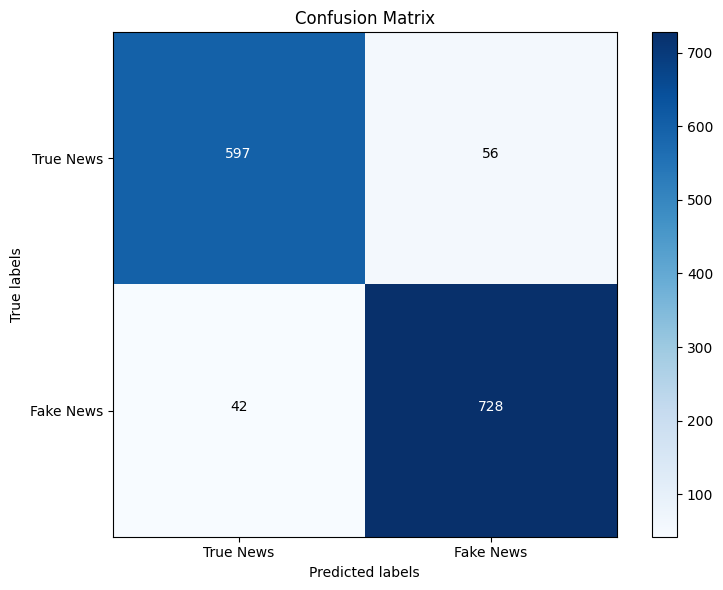

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['True News', 'Fake News'])
plt.yticks([0, 1], ['True News', 'Fake News'])
plt.tight_layout()

# Add labels to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


**RNN**

In [2]:
import pandas as pd
import random

# Load the fake news dataset
fake_news_df = pd.read_csv("/content/drive/MyDrive/hindi_fake_news.csv")

# Load the true news dataset
true_news_df = pd.read_csv("/content/drive/MyDrive/hindi_true_news.csv")

# Add a label to each dataset to distinguish between fake and true news
fake_news_df['Label'] = 1 # 0 for fake news
true_news_df['Label'] = 0 # 1 for true news

# Merge the two datasets
merged_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

# Shuffle the merged dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the merged and shuffled dataset
shuffled_df.to_csv("merged_and_shuffled_dataset.csv", index=False)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load and preprocess the dataset
shuffled_df = pd.read_csv("merged_and_shuffled_dataset.csv")
X = shuffled_df['Articles'].values
y = shuffled_df['Label'].values

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = 1000
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define a simpler model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the simplified model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save the model
model.save("simplified_fake_news_detection_model.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         1871104   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1920577 (7.33 MB)
Trainable params: 1920577 (7.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
89/89 [==============================] - 15s 129ms/step - loss: 1.4478 - accuracy: 0.6352 - val_loss: 1.6246 - val_accuracy: 0.5622
Epoch 2/5
89/89 [==============================] - 7s 81ms/step - loss: 0.7888 - accuracy: 0.6415 - val_loss: 0.4097 - val_accuracy: 0.8566


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 1s 17ms/step
Confusion Matrix:
[[565  58]
 [ 66 734]]
Precision: 0.9267676767676768
Recall: 0.9175
F1 Score: 0.922110552763819


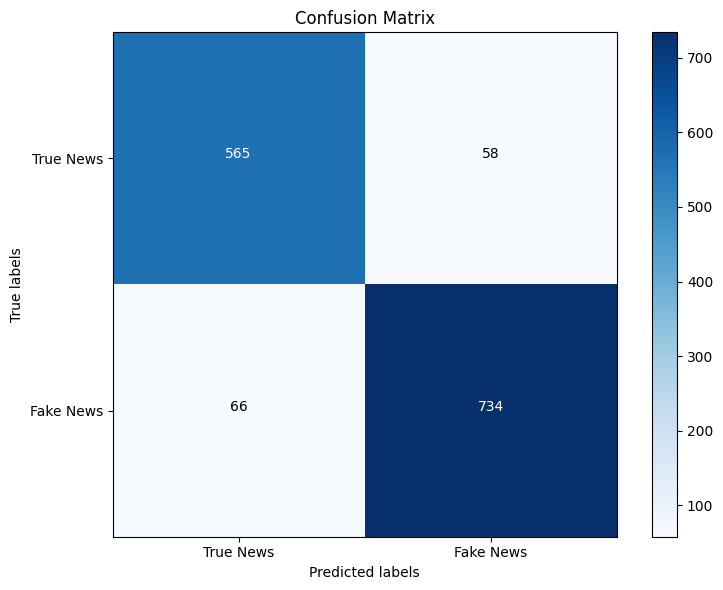

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['True News', 'Fake News'])
plt.yticks([0, 1], ['True News', 'Fake News'])
plt.tight_layout()

# Add labels to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


**CNN**

In [3]:

import pandas as pd
import random

# Load the fake news dataset
fake_news_df = pd.read_csv("/content/drive/MyDrive/hindi_fake_news.csv")

# Load the true news dataset
true_news_df = pd.read_csv("/content/drive/MyDrive/hindi_true_news.csv")

# Add a label to each dataset to distinguish between fake and true news
fake_news_df['Label'] = 1 # 0 for fake news
true_news_df['Label'] = 0 # 1 for true news

# Merge the two datasets
merged_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

# Shuffle the merged dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the merged and shuffled dataset
shuffled_df.to_csv("merged_and_shuffled_dataset.csv", index=False)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D
from gensim.models import Word2Vec


# Preprocess dataset
X = shuffled_df['Articles'].values
y = shuffled_df['Label'].values

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences
max_length = 1000
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

max_vocab = 10000

# Define CNN model
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim=max_length))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))


model.summary()
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save model
model.save("fake_news_detection_model.h5")
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load tokenizer and model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
model = load_model("fake_news_detection_model.h5")

# Function to preprocess input text
def preprocess_input_text(text):
    tokenized_text = tokenizer.texts_to_sequences([text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_length)
    return padded_text

# Function to predict the label of the input text
def predict_news(text):
    preprocessed_text = preprocess_input_text(text)
    prediction = model.predict(preprocessed_text)
    if prediction[0][0] >= 0.5:
        return "Fake News"
    else:
        return "True News"

# Example usage:
user_input = input("Enter the news article: ")
prediction = predict_news(user_input)
print("Prediction:", prediction)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 106696 (416.78 KB)
Trainable params: 106696 (416.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
89/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Enter the news article: निर्वाचन आयुक्तों के चयन के लिए PM आवास पर हुई बैठक; पंजाब में AAP के उम्मीदवार घोषित
1/1 [==============================] - 0s 57ms/step
Prediction: Fake News


45/45 [==============================] - 0s 3ms/step
Confusion Matrix:
[[328 293]
 [176 626]]
Precision: 0.6811751904243744
Recall: 0.7805486284289277
F1 Score: 0.7274840209180709


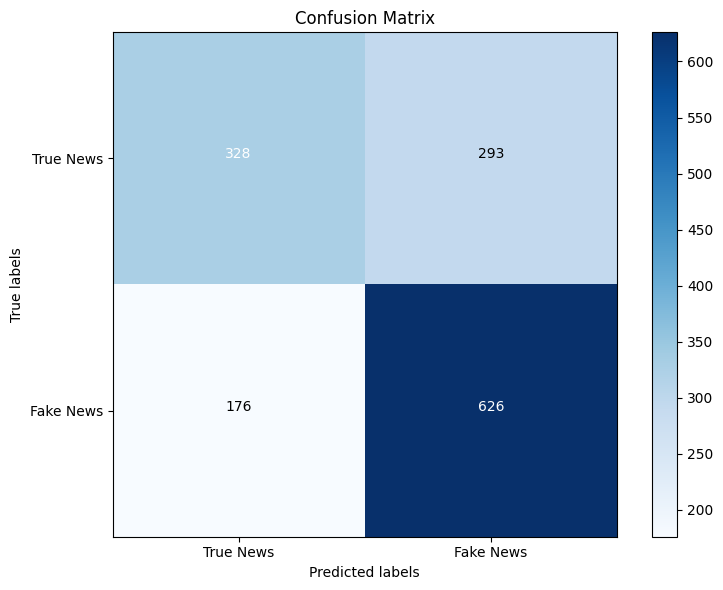

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['True News', 'Fake News'])
plt.yticks([0, 1], ['True News', 'Fake News'])
plt.tight_layout()

# Add labels to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


LOGISTIC REGRESSION

In [5]:


import pandas as pd
import random

# Load the fake news dataset
fake_news_df = pd.read_csv("/content/drive/MyDrive/hindi_fake_news.csv")

# Load the true news dataset
true_news_df = pd.read_csv("/content/drive/MyDrive/hindi_true_news.csv")

# Add a label to each dataset to distinguish between fake and true news
fake_news_df['Label'] = 1 # 0 for fake news
true_news_df['Label'] = 0 # 1 for true news

# Merge the two datasets
merged_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

# Shuffle the merged dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the merged and shuffled dataset
shuffled_df.to_csv("merged_and_shuffled_dataset.csv", index=False)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D
from gensim.models import Word2Vec


# Preprocess dataset
X = shuffled_df['Articles'].values
y = shuffled_df['Label'].values

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences
max_length = 1000
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

max_vocab = 10000

#model - logistic regression
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)


model.summary()
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save model
model.save("fake_news_detection_model.h5")
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load tokenizer and model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
model = load_model("fake_news_detection_model.h5")

# Function to preprocess input text
def preprocess_input_text(text):
    tokenized_text = tokenizer.texts_to_sequences([text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_length)
    return padded_text

# Function to predict the label of the input text
def predict_news(text):
    preprocessed_text = preprocess_input_text(text)
    prediction = model.predict(preprocessed_text)
    if prediction[0][0] >= 0.5:
        return "Fake News"
    else:
        return "True News"

# Example usage:
user_input = input("Enter the news article: ")
prediction = predict_news(user_input)
print("Prediction:", prediction)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 106696 (416.78 KB)
Trainable params: 106696 (416.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
89/89 [==============================] - 2s 6ms/step - loss: 0.6544 - accuracy: 0.6547 - val_loss: 0.6088 - val_accuracy: 0.6690
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6793 - val_loss: 0.5956 - val_accuracy: 0.6753
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.6893 - val_loss: 0.6115 - val_accuracy: 0.6655
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.7043 - val_loss: 0.6046 - val_accuracy: 0.6655
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.6872 - val_loss: 0.6323 - val_accuracy: 0.6788
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.5622 - accuracy: 0.7115 - val_loss: 0.5899 - val_accuracy: 0.6803
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.5519 - accuracy: 0.7178 - val_loss: 0.6004 - val_accuracy: 0.6880
Epoch 8/10
89/89 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Enter the news article: निर्वाचन आयुक्तों के चयन के लिए PM आवास पर हुई बैठक; पंजाब में AAP के उम्मीदवार घोषित
1/1 [==============================] - 0s 57ms/step
Prediction: Fake News


45/45 [==============================] - 0s 3ms/step
Confusion Matrix:
[[358 281]
 [170 614]]
Precision: 0.6860335195530727
Recall: 0.7831632653061225
F1 Score: 0.7313877307921383


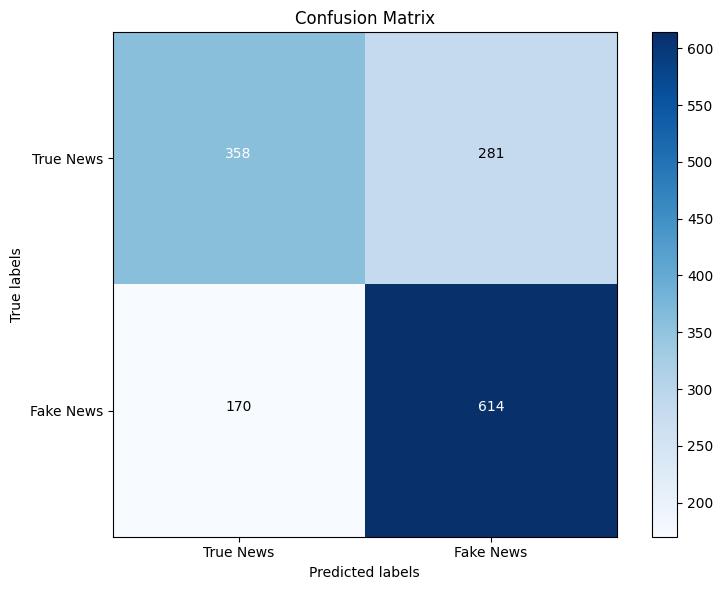

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['True News', 'Fake News'])
plt.yticks([0, 1], ['True News', 'Fake News'])
plt.tight_layout()

# Add labels to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


MULTINOMIAL NAIVE BAYES

In [7]:


import pandas as pd
import random

# Load the fake news dataset
fake_news_df = pd.read_csv("/content/drive/MyDrive/hindi_fake_news.csv")

# Load the true news dataset
true_news_df = pd.read_csv("/content/drive/MyDrive/hindi_true_news.csv")

# Add a label to each dataset to distinguish between fake and true news
fake_news_df['Label'] = 1 # 0 for fake news
true_news_df['Label'] = 0 # 1 for true news

# Merge the two datasets
merged_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

# Shuffle the merged dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the merged and shuffled dataset
shuffled_df.to_csv("merged_and_shuffled_dataset.csv", index=False)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D
from gensim.models import Word2Vec


# Preprocess dataset
X = shuffled_df['Articles'].values
y = shuffled_df['Label'].values

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences
max_length = 1000
X_padded = pad_sequences(X_seq, maxlen=max_length)

X_train, X_val, y_train, y_val = train_test_split(X_padded, y,
                                                  train_size=0.7,
                                                  random_state=42)



max_vocab = 10000

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
preds = clf.predict(X_val)

print(accuracy_score(y_val, preds))


model.summary()
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save model
model.save("fake_news_detection_model.h5")
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load tokenizer and model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
model = load_model("fake_news_detection_model.h5")

# Function to preprocess input text
def preprocess_input_text(text):
    tokenized_text = tokenizer.texts_to_sequences([text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_length)
    return padded_text

# Function to predict the label of the input text
def predict_news(text):
    preprocessed_text = preprocess_input_text(text)
    prediction = model.predict(preprocessed_text)
    if prediction[0][0] >= 0.5:
        return "Fake News"
    else:
        return "True News"

# Example usage:
user_input = input("Enter the news article: ")
prediction = predict_news(user_input)
print("Prediction:", prediction)

0.5815370196813496
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 106696 (416.78 KB)
Trainable params: 106696 (416.78 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Enter the news article: बड़े घटनाक्रम निर्वाचन आयुक्तों के चयन के लिए PM आवास पर हुई बैठक; पंजाब में AAP के उम्मीदवार घोषित
1/1 [==============================] - 0s 58ms/step
Prediction: Fake News


45/45 [==============================] - 0s 5ms/step
Confusion Matrix:
[[402 237]
 [ 91 693]]
Precision: 0.7451612903225806
Recall: 0.8839285714285714
F1 Score: 0.8086347724620769


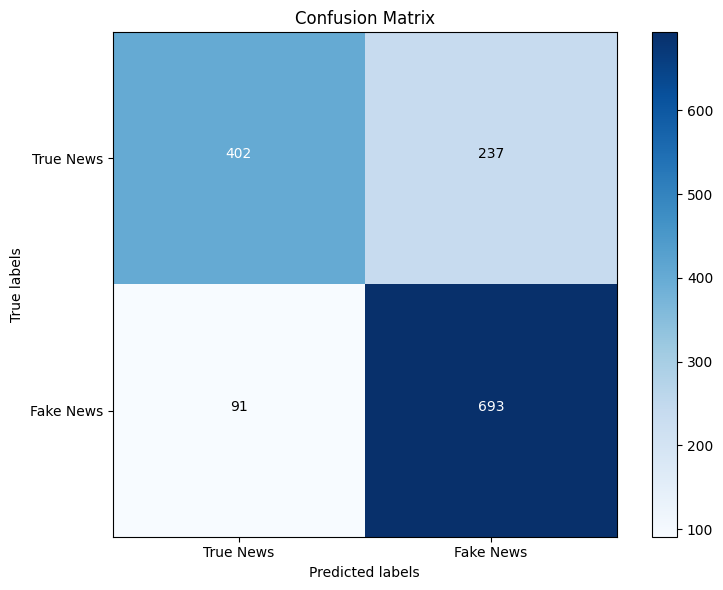

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['True News', 'Fake News'])
plt.yticks([0, 1], ['True News', 'Fake News'])
plt.tight_layout()

# Add labels to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


compare

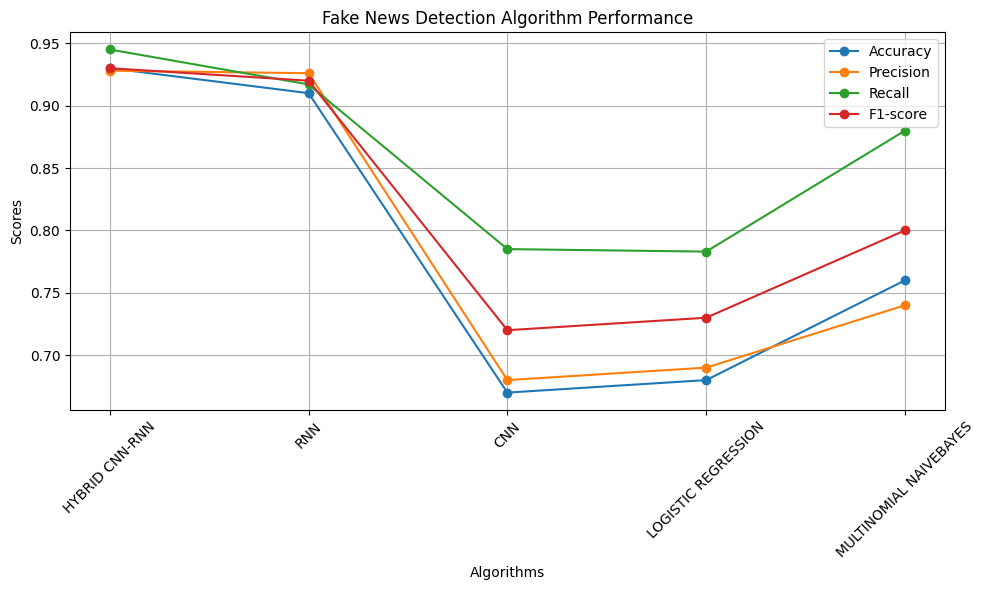

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for fake news detection algorithms
algorithms = ['HYBRID CNN-RNN', 'RNN', 'CNN', 'LOGISTIC REGRESSION', 'MULTINOMIAL NAIVEBAYES']
accuracy = [0.93, 0.91, 0.67, 0.68, 0.76]
precision = [0.928, 0.926, 0.68, 0.69, 0.74]
recall = [0.945, 0.917, 0.785, 0.783, 0.88]
f1_score = [0.93, 0.92, 0.72, 0.73, 0.80]

# Creating a DataFrame for the data
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score}
df = pd.DataFrame(data, index=algorithms)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.plot(df.index, df['Accuracy'], marker='o', label='Accuracy')

# Plotting precision
plt.plot(df.index, df['Precision'], marker='o', label='Precision')

# Plotting recall
plt.plot(df.index, df['Recall'], marker='o', label='Recall')

# Plotting f1-score
plt.plot(df.index, df['F1-score'], marker='o', label='F1-score')


# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Fake News Detection Algorithm Performance')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
